In [ ]:
import os
from google.colab import drive

# Verificar si Google Drive ya está montado
if not os.path.ismount("/content/drive"):
    drive.mount("/content/drive", force_remount=True)
    print("Google Drive montado correctamente.")
else:
    print("Google Drive ya estaba montado.")

# Cambiar al directorio de trabajo
working_dir = "/content/drive/MyDrive/01_Supernovae_ThesisSteve"
if os.path.exists(working_dir):
    %cd $working_dir
    print(f"Directorio cambiado a: {working_dir}")
else:
    print(f"⚠️ Error: El directorio {working_dir} no existe.")

Mounted at /content/drive
Google Drive montado correctamente.
/content/drive/MyDrive/01_Supernovae_ThesisSteve
Directorio cambiado a: /content/drive/MyDrive/01_Supernovae_ThesisSteve


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

rc_params = {
    'mathtext.fontset': 'cm',      # Set default mathtext font
    'font.family': 'STIXGeneral',  # Set default font family
    #'xtick.direction': 'in',       # Set default xtickdirecion
    #'xtick.minor.visible': False,  # visibility of minor ticks on x-axis
    #'ytick.direction': 'in',       # Set default ytickdirecion
    #'ytick.minor.visible': False,  # visibility of minor ticks on y-axis
}

matplotlib.rcParams.update(rc_params)

In [4]:
DATA_DIR = '../SNeMPhyVAE/data/'

object_table_path = f'{DATA_DIR}object_ZTF_ALeRCE_19052024.pkl'
object_table = pd.read_pickle(object_table_path)
object_table.head()

,oid,source_id,firstmjd,Av_MW,true_label
0,ZTF24aanbjel,2024iqx,60440.299120,0.0287,SN
1,ZTF24aamkufg,2024igh,60437.289560,0.0261,SNIa
2,ZTF24aajnwwr,2024hqr,60429.209850,0.0509,SNIa
3,ZTF18aaeopbs,2024glo,60407.202211,0.1403,SNIa
4,ZTF24aamtsgz,2024ipf,60438.397951,0.2484,SNIa


In [5]:
object_table.true_label.unique()

array(['SN', 'SNIa', 'SNII', 'SNIbc', 'SNIIn', 'SNIIb', 'SLSN', 'SN I',
       'SNIc'], dtype=object)

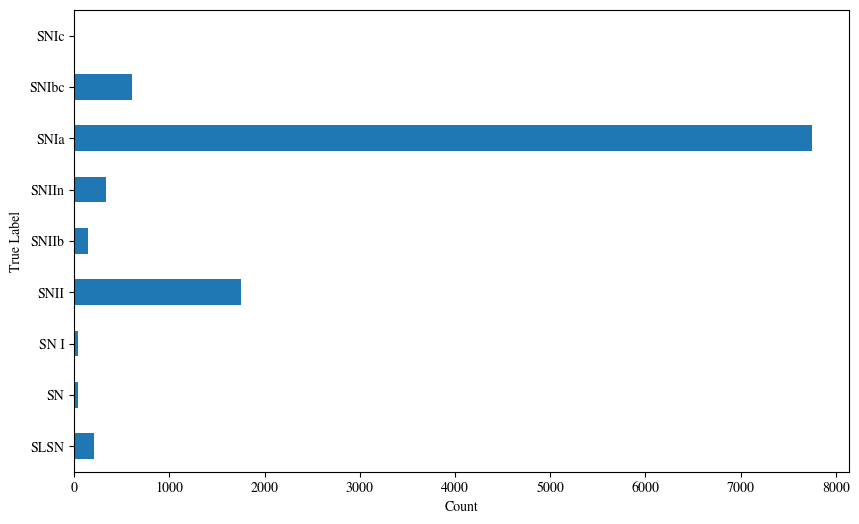

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = object_table.groupby('true_label').size().plot(kind='barh')
ax.set_ylabel('True Label')
ax.set_xlabel('Count')
plt.show()

In [7]:
print('Number of different elements in Object table:')
print(object_table.oid.nunique())

Number of different elements in Object table:
10870


In [8]:
lightcurves_alercextns_path = f'{DATA_DIR}lcs_transients_20240517.pkl'
lightcurves_alercextns = pd.read_pickle(lightcurves_alercextns_path)
lightcurves_alercextns.head()

,oid,candid,rfid,mjd,fid,magpsf,sigmapsf
0,ZTF19abgpgyp,1515523874715015006,681120247.0,59269.523877,2,20.38572,0.211641
1,ZTF19abgpgyp,1499511354715015014,NaN,59253.511354,2,20.67840,0.258971
2,ZTF19abgpgyp,1502430264715015014,NaN,59256.430266,2,20.65250,0.269586
3,ZTF19abgpgyp,1510536184715015009,NaN,59264.536181,2,20.66360,0.299923
4,ZTF18abjswhy,1515520891415015005,685120214.0,59269.520891,2,16.07946,0.030863


In [9]:
print('Number of different elements in AlerceTNS table:')
print(lightcurves_alercextns.oid.nunique())

Number of different elements in AlerceTNS table:
69519


In [10]:
def crossmatch_object_alerce(alerce_lc_table: pd.DataFrame, object_table: pd.DataFrame) -> pd.DataFrame:
    lightcurves = pd.merge(left=alerce_lc_table, right=object_table,
                       on='oid')
    return lightcurves

lightcurves = crossmatch_object_alerce(lightcurves_alercextns, object_table)
lightcurves.head()

,oid,candid,rfid,mjd,fid,magpsf,sigmapsf,source_id,firstmjd,Av_MW,true_label
0,ZTF19abgpgyp,1515523874715015006,681120247.0,59269.523877,2,20.38572,0.211641,2019lkw,58681.194086,0.0608,SNII
1,ZTF19abgpgyp,1499511354715015014,NaN,59253.511354,2,20.67840,0.258971,2019lkw,58681.194086,0.0608,SNII
2,ZTF19abgpgyp,1502430264715015014,NaN,59256.430266,2,20.65250,0.269586,2019lkw,58681.194086,0.0608,SNII
3,ZTF19abgpgyp,1510536184715015009,NaN,59264.536181,2,20.66360,0.299923,2019lkw,58681.194086,0.0608,SNII
4,ZTF19aatubsj,1515535253915015003,634120239.0,59269.535255,2,20.25105,0.161910,2019fdr,58605.400428,0.1393,SLSN


In [11]:
print('Number of different elements in Lightcurve table:')
print(lightcurves.oid.nunique())

Number of different elements in Lightcurve table:
8042


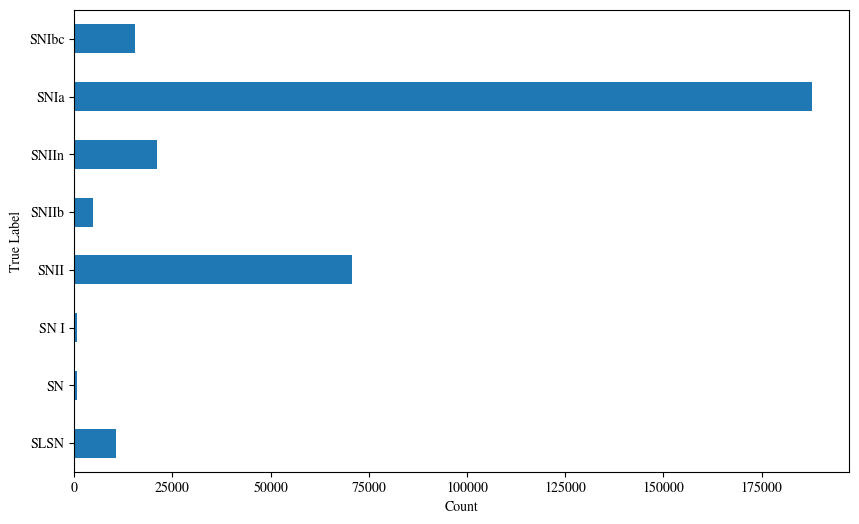

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = lightcurves.groupby('true_label').size().plot(kind='barh')
ax.set_ylabel('True Label')
ax.set_xlabel('Count')
plt.show()

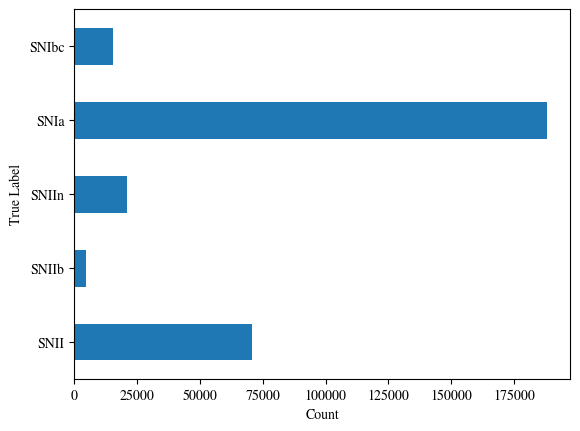

In [13]:
fig, ax = plt.subplots()
ax = lightcurves.groupby('true_label').size().drop(['SN','SLSN','SN I']).plot(kind='barh')
ax.set_ylabel('True Label')
ax.set_xlabel('Count')
plt.show()

In [35]:
min_data = lightcurves.groupby(['oid','fid'])['magpsf'].transform('std') < 1e-27
min_data

0         False
1         False
2         False
3         False
4         False
          ...  
311883    False
311884    False
311885    False
311886    False
311887    False
Name: magpsf, Length: 311888, dtype: bool

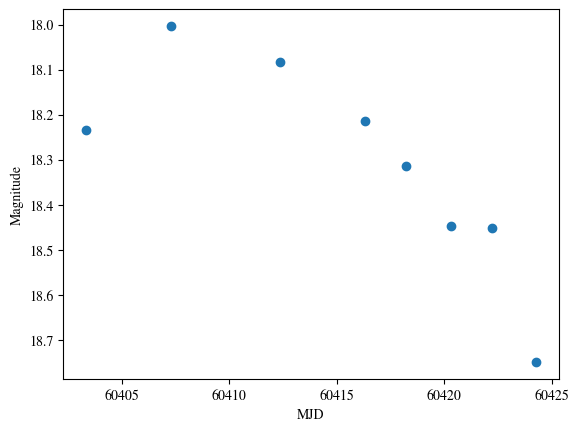

In [32]:
# 1. Define the unique groups
# We group by both 'oid' and 'fid' (assuming 'fid' is the filter band)
grouped = min_data.groupby(['oid', 'fid'])

# 2. Get the name of the very first group (a tuple of (oid, fid))
first_group_name = list(grouped.groups.keys())[5]

# 3. Extract the DataFrame for that specific group
first_group_data = grouped.get_group(first_group_name)

# 4. Plot the data for the first group only
plt.plot(first_group_data['mjd'], first_group_data['magpsf'], 'o')
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

In [14]:
snii = lightcurves[lightcurves['true_label'].isin(['SNIIn','SNIIb','SNII'])]

In [ ]:
snii.oid.nunique()

1737

In [ ]:
snii.groupby('oid').fid.value_counts()

oid           fid
ZTF18aaaibml  2      12
              1      10
ZTF18aacemcn  2      27
              1       2
ZTF18aacnlxz  2      10
                     ..
ZTF24aaknlar  2      20
              3       3
ZTF24aaleeji  1       9
              2       9
              3       2
Name: count, Length: 3480, dtype: int64

In [ ]:
print('Minimum number of points: ', min(snii.groupby('oid').fid.value_counts()))
print('Max number of points: ', max(snii.groupby('oid').fid.value_counts()))

Minimum number of points:  1
Max number of points:  863


In [ ]:
snii_list_erased = []
for snii_group in snii.groupby('oid'):
    group_key, group_dataframe = snii_group
    count = group_dataframe.fid.value_counts()
    if len(count) == 2 and ((count.iloc[0] < 10) or (count.iloc[1] < 10)):
        snii_list_erased.append(group_key)
        print(group_key)
        print(count)
    elif len(count) == 1 and count.iloc[0] < 10:
        print(group_key)
        print(count)
        snii_list_erased.append(group_key)

ZTF18aacemcn
fid
2    27
1     2
Name: count, dtype: int64
ZTF18aacnlxz
fid
2    10
1     8
Name: count, dtype: int64
ZTF18aadmssd
fid
2    15
1     8
Name: count, dtype: int64
ZTF18aakfabl
fid
2    10
1     6
Name: count, dtype: int64
ZTF18aaqkdwf
fid
1    10
2     6
Name: count, dtype: int64
ZTF18aarqxbw
fid
2    14
1     9
Name: count, dtype: int64
ZTF18aawpfpp
fid
1    16
2     3
Name: count, dtype: int64
ZTF18abcpmwh
fid
2    18
1     7
Name: count, dtype: int64
ZTF18abddjpt
fid
2    10
1     5
Name: count, dtype: int64
ZTF18abdfwcy
fid
2    15
1     6
Name: count, dtype: int64
ZTF18abfzixe
fid
2    15
1     6
Name: count, dtype: int64
ZTF18abiiqdl
fid
1    8
2    7
Name: count, dtype: int64
ZTF18abjndhh
fid
2    9
1    2
Name: count, dtype: int64
ZTF18abojpnr
fid
1    10
2     6
Name: count, dtype: int64
ZTF18abrlljc
fid
2    8
1    7
Name: count, dtype: int64
ZTF18absbgqd
fid
2    14
1     6
Name: count, dtype: int64
ZTF18abucxcj
fid
1    6
2    3
Name: count, dtype: int64
ZTF18

In [ ]:
snii = snii[~snii.oid.isin(snii_list_erased)]
snii.head()

,oid,candid,rfid,mjd,fid,magpsf,sigmapsf,source_id,firstmjd,Av_MW,true_label
0,ZTF19abgpgyp,1515523874715015006,681120247.0,59269.523877,2,20.385720,0.211641,2019lkw,58681.194086,0.0608,SNII
1,ZTF19abgpgyp,1499511354715015014,NaN,59253.511354,2,20.678400,0.258971,2019lkw,58681.194086,0.0608,SNII
2,ZTF19abgpgyp,1502430264715015014,NaN,59256.430266,2,20.652500,0.269586,2019lkw,58681.194086,0.0608,SNII
3,ZTF19abgpgyp,1510536184715015009,NaN,59264.536181,2,20.663600,0.299923,2019lkw,58681.194086,0.0608,SNII
6,ZTF20acqqdkl,1516144181415015001,604120214.0,59270.144190,2,18.962399,0.156558,2020aafb,59168.215486,0.2383,SNIIn


In [ ]:
snii.oid.nunique()

1290

In [ ]:
def clean_lightcurves(lightcurves: pd.DataFrame) -> pd.DataFrame:

    # Select the
    snii = lightcurves[lightcurves['true_label'].isin(['SNIIn','SNIIb','SNII'])]
    snii_list_erased = []
    for snii_group in snii.groupby('oid'):
        group_key, group_dataframe = snii_group
        count = group_dataframe.fid.value_counts()
        if len(count) == 2 and ((count.iloc[0] < 10) or (count.iloc[1] < 10)):
            snii_list_erased.append(group_key)
            #print(group_key)
            #print(count)
        elif len(count) == 1 and count.iloc[0] < 10:
            #print(group_key)
            #print(count)
            snii_list_erased.append(group_key)

    return snii[~snii.oid.isin(snii_list_erased)]


snii = clean_lightcurves(lightcurves)

In [ ]:
snii.true_label.unique()

array(['SNII', 'SNIIn', 'SNIIb'], dtype=object)

In [ ]:
snii.oid.nunique()

1290

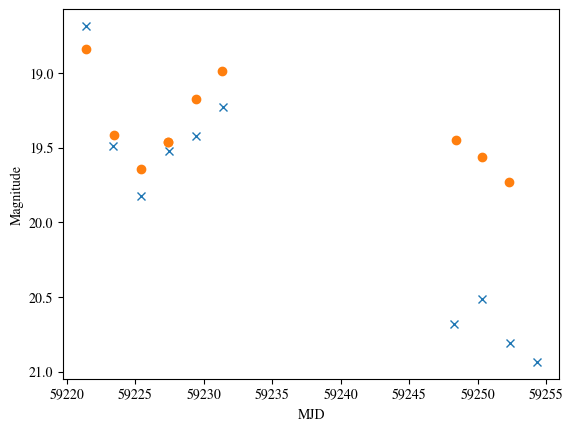

In [ ]:
snii_name = np.random.choice(snii.oid)

snii_data = snii.loc[snii['oid'] == snii_name]
fig, ax = plt.subplots()
ax.plot(snii_data.loc[snii_data['fid'] == 1, 'mjd'], snii_data.loc[snii_data['fid'] == 1, 'magpsf'], 'x')
ax.plot(snii_data.loc[snii_data['fid'] == 2, 'mjd'], snii_data.loc[snii_data['fid'] == 2, 'magpsf'], 'o')
ax.set_xlabel('MJD')
ax.set_ylabel('Magnitude')
ax.invert_yaxis()
plt.show()

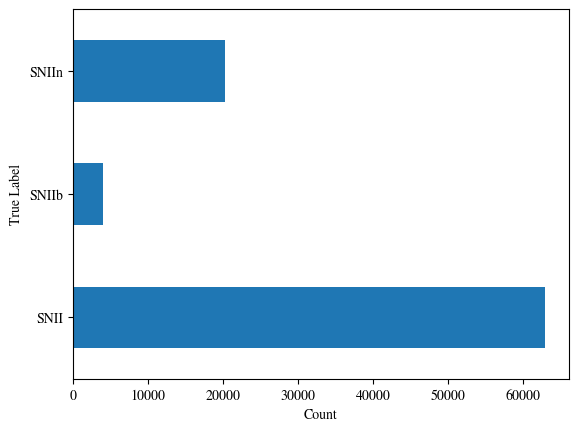

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
ax = snii.groupby('true_label').size().plot(kind='barh')
ax.set_ylabel('True Label')
ax.set_xlabel('Count')
plt.show()
plt.savefig('img.pdf',dpi=300, bbox_inches='tight')

In [ ]:
import numpy as np
import pandas as pd

object_table_path           = './Data/object_ZTF_ALeRCE_19052024.pkl'
lightcurves_alercextns_path = './Data/lcs_transients_20240517.pkl'

object_table           = pd.read_pickle(filepath_or_buffer=object_table_path)
lightcurves_alercextns = pd.read_pickle(filepath_or_buffer=lightcurves_alercextns_path)

lightcurves = pd.merge(left=lightcurves_alercextns, right=object_table, on='oid')
lightcurves.oid.nunique()

8042

In [ ]:
import numpy as np
import pandas as pd

class LightCurves():

    def __init__(self):
        self.lightcurves = None

    def _load_data(self, snii_only=False):
        """

        Params
        -------
        - snii_only: bool,
            Obtain only type II SN: [SNII, SNIIn, SNIIb]

        Returns
        -------
        - ligthcurves: pd.DataFrame,
            DataFrame with supernovae's lightcurves after
            perfom the cross-match between the object table and
            alerce table through merge function on the 'oids'.
        """
        object_table_path           = './Data/object_ZTF_ALeRCE_19052024.pkl'
        lightcurves_alercextns_path = './Data/lcs_transients_20240517.pkl'

        object_table           = pd.read_pickle(filepath_or_buffer=object_table_path)
        lightcurves_alercextns = pd.read_pickle(filepath_or_buffer=lightcurves_alercextns_path)

        self.lightcurves = pd.merge(left=lightcurves_alercextns, right=object_table, on='oid')

        if snii_only:
            lightcurves = lightcurves[lightcurves['true_label'].isin(['SNIIn','SNIIb','SNII'])]

        return self.lightcurves

    def _clean(self):
        """Clean data

        """
        if self.lightcurves is None:
            raise ValueError('First you need load the data with _load_data()')

        sn_list_erased = []
        for sn_oid, sn_data in self.lightcurve.groupby(by='oid'):

            fid_count = sn_data.fid.value_counts()
            if len(fid_count) == 1 and fid_count.iloc[0] < 10:
                sn_list_erased.append(sn_oid)
            if len(fid_count) == 2 and ((fid_count.iloc[0] < 10) or (fid_count.iloc[1] < 10)):
                sn_list_erased.append(sn_oid)

        self.lightcurves = [~self.lightcurve.oid.isin(sn_list_erased)]

        return self.lightcurves